<a href="https://colab.research.google.com/github/victor-azevedo/ds-classification-churn-telco/blob/main/classificador_churn_telco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

from google.colab import files
files.upload() #this will prompt you to upload the kaggle.json

In [2]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!pwd

/content


In [3]:
!kaggle datasets download -d blastchar/telco-customer-churn
!unzip telco-customer-churn.zip
!ls

  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 65.1MB/s]
Archive:  telco-customer-churn.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  
drive	kaggle.json  telco-customer-churn.zip
gdrive	sample_data  WA_Fn-UseC_-Telco-Customer-Churn.csv


In [4]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

In [8]:
churn_telco = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
churn_telco.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6926,1450-SKCVI,Female,0,No,No,56,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,73.85,4092.85,Yes
4153,5214-CHIWJ,Male,0,No,No,27,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.30,595.05,No
5101,6591-QGOYB,Male,0,No,No,17,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,No,Month-to-month,Yes,Bank transfer (automatic),106.65,1672.1,No
4623,8755-IWJHN,Male,1,Yes,No,69,Yes,Yes,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),95.35,6382,No
2677,2608-BHKFN,Female,0,No,No,4,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),70.05,266.9,Yes
2295,2672-DZUOY,Male,0,No,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,25.15,25.15,Yes
6880,6976-BWGLQ,Female,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),25.20,1787.35,No
3484,2921-XWDJH,Female,1,Yes,No,38,Yes,No,Fiber optic,Yes,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,83.45,3147.15,No
1298,5989-OMNJE,Female,0,Yes,Yes,24,No,No phone service,DSL,Yes,...,Yes,No,Yes,Yes,One year,No,Electronic check,57.60,1367.75,No
376,6158-HDPXZ,Male,0,No,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,25.35,25.35,No


Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents
Inspiration
To explore this type of models and learn more about the subject.



In [9]:
churn_telco.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [10]:
churn_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
[print(f'{churn_telco.columns[n]}:\n{churn_telco.iloc[:,n].value_counts()}\n\n') for n in range(0, churn_telco.shape[1])]

customerID:
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64


gender:
Male      3555
Female    3488
Name: gender, dtype: int64


SeniorCitizen:
0    5901
1    1142
Name: SeniorCitizen, dtype: int64


Partner:
No     3641
Yes    3402
Name: Partner, dtype: int64


Dependents:
No     4933
Yes    2110
Name: Dependents, dtype: int64


tenure:
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


PhoneService:
Yes    6361
No      682
Name: PhoneService, dtype: int64


MultipleLines:
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


InternetService:
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


OnlineSecurity:
No    

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

### Conclusões iniciais: 

1. Base de dados com **7.043** registros únicos.

2. Cada entrada de dado possui **21** atributos:
  - **1** atributo para identificar entrada de dado identificar o cliente(*customerID*);
  - **1** atributo alvo binário *Churn*(*Yes* ou *No*);
  - **19** atributos relacionados ao cliente. 

2. Variável alvo: **Churn**
  - 5.174 No Churn;
  - 1.869 Churn;
  - Observa-se que é um conjunto de dados desbalanceado. 

3. Os atributos relacionados a cada cliente são:
   - Social (Gênero, se tem Parceiro(a), se tem Dependente e se é Idoso(a));
   - Serviço de Telefone (se tem serviço de Telefone e se Tem Multiplas Linhas de Telefone);
   - Serviço de Internet (se tem serviço de Internet e qual o tipo de serviço de Internet e se possui os serviçoes atrelados: Segurança, Backup, Proteção do Dispositivo, Suporte Técnico, Stremming de TV ou Filme);
   - Tipo de Contrato;
   - Forma de Pagamento;
   - Fatura Digital;
   - Tempo de contrato em meses;
   - Valor do Contrato Mensal;
   - Valor total já pago pelo cliente.  
   
4. Tem-se 3 atributos Quantitativos: *Tenure*, *ChargesMontly* e *ChargesTotal* e as demais Qualitativas.
Obs: apesar de *SeniorCitizen* ter informada como int64, trata-se de uma variavel categórica binária, se clienete é Idoso ou não (0 para Não e 1 para Sim). 

### Tratamento dos dados: 

1. *customerID* é um atrtibuto para identificar cada cliente. Deve-se desconsidera-lo para a tarefa de classificação.
>**AÇÃO:** remover o atributo *customerID* do dataframe que será aplicado ao modelo de classificação.

2. Observa-se que alguns atributos estão com os nomes em formato diferentes, camelCase ou PascalCase.
>**AÇÃO:** Padronizar o formato do nome dos atributos para PascalCase.

3. Há **11** clientes com o registros faltantes para *Charges.Total*. Observa-se que tambem há **11** clientes com menos de 1 mes de contrato (ternure = 0).
>**AÇÃO:** Certificar se os **11** clientes com menos de 1 mes de contrato são os mesmos clientes no qual consta com registro vazio na coluna *Charges.Total*. Caso necessario, se o algum dos 11 clientes com *Charges.Total* zerado tiver 1 ou mais meses de contrato, pode-se estimaro *Charges.Total* por: $Charges.Total = tenure * Charges.Monthly$ 

4. *Charges.Total* aparece como tipo *object* ao contrario de *Charges.Monthly* que tambem apresenta valores numérios e é do tipo *float*.
>**AÇÃO:** Transformar *Charges.Total* para o tipo *float*, assim como *Charges.Monthly* ja é.

5. No campo*PaymentMethod* temos os valores *Bank transfer (automatic)* e *Credit card (automatic)*, será desconsiderado *(automatic)* para deixar este campo mais limpo, portanto so valores passarão a ser: *Bank transfer* e *Credit card* 
>**AÇÃO:** Limpar os valores *Bank transfer (automatic)* e *Credit card (automatic)* retirando *(automatic)*.

#### AÇÃO 1: remover o atributo customerID do dataframe que será aplicado ao modelo de classificação.

In [12]:
churn_telco.drop(columns=['customerID'], inplace=True)

#### AÇÃO 2: Padronizar o formato do nome dos atributos para PascalCase.

In [13]:
churn_telco.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [14]:
churn_telco.columns = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

#### AÇÃO 3: Verificar relação entre Tenure e TotalCharges

In [15]:
churn_telco.loc[churn_telco['Tenure'] == 0, ['Tenure','TotalCharges']]

,Tenure,TotalCharges
488,0,
753,0,
936,0,
1082,0,
1340,0,
3331,0,
3826,0,
4380,0,
5218,0,
6670,0,


Constatado que os dados vazios de *Charges.Total* sao referente ao clientes com menos de 1 mes de contrato, portanto os dados vazios serao preenchidos com o valor **0**.

#### AÇÃO 4: Transformar Charges.Total para o tipo float

In [16]:
churn_telco['TotalCharges'] = churn_telco['TotalCharges'].apply(lambda n: 0 if n == ' ' else float(n))

churn_telco.loc[churn_telco['Tenure'] == 0, ['Tenure','TotalCharges']]

,Tenure,TotalCharges
488,0,0.0
753,0,0.0
936,0,0.0
1082,0,0.0
1340,0,0.0
3331,0,0.0
3826,0,0.0
4380,0,0.0
5218,0,0.0
6670,0,0.0


#### AÇÃO 5: Limpar os valores *Bank transfer (automatic)* e *Credit card (automatic)* retirando *(automatic)*.

In [17]:
churn_telco['PaymentMethod'] = churn_telco['PaymentMethod'].apply(lambda x:'Bank transfer' if x == 'Bank transfer (automatic)' else x)
churn_telco['PaymentMethod'] = churn_telco['PaymentMethod'].apply(lambda x:'Credit card' if x == 'Credit card (automatic)' else x)
churn_telco['PaymentMethod'].value_counts()

Electronic check    2365
Mailed check        1612
Bank transfer       1544
Credit card         1522
Name: PaymentMethod, dtype: int64

In [18]:
churn_telco.head(10)

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card,89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer,56.15,3487.95,No


In [19]:
churn_telco.describe()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


## 2. Transformação dos Dados

Nesta seção os os dados binários são passado para representação numérica,
Para o gênero: 0 para 'Male' e 1 para'Female'.
Para as demais variaveis binárias: 0 e 1 para 'No' e 'Yes'.

- OBS: Foi considerado para 'No phone/internet service' como 'No' nos atributos MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV e StreamingMovies. Para neste primeiro momento Simplificar o numero de entrada resultantes.



In [20]:
churn_telco_transformed = churn_telco.copy()

In [21]:
churn_telco_transformed.columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [22]:
label_columns_binary = ['Gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Churn']

# encode categorical binary features using label encoding
for column in label_columns_binary:
    if column == 'Gender':
        churn_telco_transformed[column] = churn_telco_transformed[column].map({'Female': 1, 'Male': 0})
    else: 
        churn_telco_transformed[column] = churn_telco_transformed[column].map({'Yes': 1, 'No': 0, 'No phone service': 0, 'No internet service': 0})

### Aplicando One-hot para as variaveis: InternetService, Contract e PaymentMethod.

In [23]:
churn_telco_transformed = pd.get_dummies(churn_telco_transformed, columns = ['InternetService', 'Contract', 'PaymentMethod'])
churn_telco_transformed.columns


Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year'],
      dtype='object')

In [24]:
feature_names = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year']

In [25]:
churn_telco_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       7043 non-null   int64  
 1   SeniorCitizen                7043 non-null   int64  
 2   Partner                      7043 non-null   int64  
 3   Dependents                   7043 non-null   int64  
 4   Tenure                       7043 non-null   int64  
 5   PhoneService                 7043 non-null   int64  
 6   MultipleLines                7043 non-null   int64  
 7   OnlineSecurity               7043 non-null   int64  
 8   OnlineBackup                 7043 non-null   int64  
 9   DeviceProtection             7043 non-null   int64  
 10  TechSupport                  7043 non-null   int64  
 11  StreamingTV                  7043 non-null   int64  
 12  StreamingMovies              7043 non-null   int64  
 13  PaperlessBilling  

In [26]:
churn_telco_transformed.describe()


,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.495244,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,...,0.592219,64.761692,2279.734304,0.265370,0.343746,0.439585,0.216669,0.550192,0.209144,0.240664
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,...,0.491457,30.090047,2266.794470,0.441561,0.474991,0.496372,0.412004,0.497510,0.406726,0.427517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,35.500000,398.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,70.350000,1394.550000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,89.850000,3786.600000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Modelagem

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from six import StringIO
# from sklearn.externals.six import StringIO 

from IPython.display import Image 
from pydot import graph_from_dot_data



In [28]:
# Split the data into features (X) and target (y)
X = churn_telco_transformed.drop('Churn', axis=1)
y = churn_telco_transformed['Churn']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [30]:
weights = {0:y_train.value_counts(normalize=True)[1], 1:y_train.value_counts(normalize=True)[0]}
weights

{0: 0.2652404392275653, 1: 0.7347595607724347}

In [31]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

# Scale the features using StandardScaler
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

### Classificador KNeighbors

In [32]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train_scaler, y_train)

KNeighborsClassifier(n_neighbors=25)

In [33]:
y_pred = knn.predict(X_test_scaler)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1293
           1       0.61      0.55      0.58       468

    accuracy                           0.79      1761
   macro avg       0.73      0.71      0.72      1761
weighted avg       0.78      0.79      0.79      1761



Usando validacao cruzada

In [34]:
k_values = [i for i in range (5,31)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_scaler, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

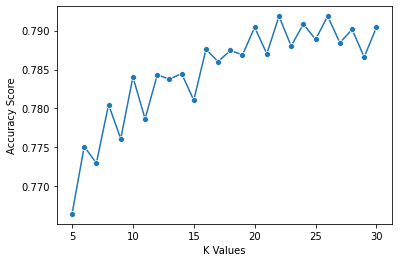

In [35]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

### Classificador DecisionTree

In [36]:
dt = DecisionTreeClassifier(class_weight=weights)
dt.fit(X_train_scaler, y_train)

DecisionTreeClassifier(class_weight={0: 0.2652404392275653,
                                     1: 0.7347595607724347})

In [37]:
# dot_data = StringIO()
# export_graphviz(dt, out_file=dot_data, feature_names=feature_names)
# (graph, ) = graph_from_dot_data(dot_data.getvalue())
# Image(graph.create_png())

In [38]:
y_pred = dt.predict(X_test_scaler)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1293
           1       0.50      0.48      0.49       468

    accuracy                           0.74      1761
   macro avg       0.66      0.65      0.66      1761
weighted avg       0.73      0.74      0.73      1761



### Regressao Logistica

In [39]:
params = {
    'penalty': ['l1', 'l2'],
    'C': [1, 2, 10]
}
cv = StratifiedKFold(n_splits=10)

In [40]:
model_template = LogisticRegression(solver='saga', max_iter=10000, class_weight=weights)
clf = GridSearchCV(
    model_template,
    params,
    cv=cv,
    scoring=['recall', 'f1', 'precision' ],
    refit='recall',
    return_train_score=True,

)

In [41]:
clf.fit(X_scaler, y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LogisticRegression(class_weight={0: 0.2652404392275653,
                                                        1: 0.7347595607724347},
                                          max_iter=10000, solver='saga'),
             param_grid={'C': [1, 2, 10], 'penalty': ['l1', 'l2']},
             refit='recall', return_train_score=True,
             scoring=['recall', 'f1', 'precision'])

In [42]:
# clf.cv_results_

In [43]:
clf.best_estimator_

LogisticRegression(C=2,
                   class_weight={0: 0.2652404392275653, 1: 0.7347595607724347},
                   max_iter=10000, solver='saga')

Modelo Selecionado

In [44]:
#model_lr = LogisticRegression(C=2, max_iter=10000, penalty='l1', solver='saga', class_weight=weights)

In [45]:
clf.best_estimator_.fit(X_train_scaler, y_train)

LogisticRegression(C=2,
                   class_weight={0: 0.2652404392275653, 1: 0.7347595607724347},
                   max_iter=10000, solver='saga')

In [46]:
y_pred = clf.best_estimator_.predict(X_test_scaler)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.72      0.80      1293
           1       0.50      0.76      0.60       468

    accuracy                           0.73      1761
   macro avg       0.69      0.74      0.70      1761
weighted avg       0.79      0.73      0.75      1761



### SVM

In [47]:
params = {
    'C': [0.1, 1, 5, 10],
    'gamma': ['scale', 'auto']
}
cv = StratifiedKFold(n_splits=10)

In [48]:
model_template = SVC(kernel='linear', class_weight=weights)
c_svm = GridSearchCV(
    model_template,
    params,
    cv=cv,
    scoring=['recall', 'f1', 'precision' ],
    refit='recall',
    return_train_score=True,)

In [49]:
c_svm.fit(X_scaler, y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=SVC(class_weight={0: 0.2652404392275653,
                                         1: 0.7347595607724347},
                           kernel='linear'),
             param_grid={'C': [0.1, 1, 5, 10], 'gamma': ['scale', 'auto']},
             refit='recall', return_train_score=True,
             scoring=['recall', 'f1', 'precision'])

In [50]:
c_svm.best_estimator_

SVC(C=0.1, class_weight={0: 0.2652404392275653, 1: 0.7347595607724347},
    kernel='linear')

In [51]:
# c_svm.cv_results_

In [52]:
model_with_normalization = SVC(C=0.1, kernel='linear', class_weight=weights)

In [53]:
c_svm.best_estimator_.fit(X_train_scaler, y_train)

SVC(C=0.1, class_weight={0: 0.2652404392275653, 1: 0.7347595607724347},
    kernel='linear')

In [54]:
y_pred = c_svm.best_estimator_.predict(X_test_scaler)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.65      0.76      1293
           1       0.46      0.81      0.58       468

    accuracy                           0.69      1761
   macro avg       0.68      0.73      0.67      1761
weighted avg       0.78      0.69      0.71      1761

